In [1]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import IPython


training_data_filepath='titanic/data/train.csv'

print 'The path to the training data set is correct: ', os.path.exists(training_data_filepath)


df_training = pd.read_csv(training_data_filepath)

The path to the training data set is correct:  True


In [2]:
df_training.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)

In [3]:
df_training_clean = df_training.drop(['Age','Cabin','Embarked','Name','Sex','Ticket'],axis=1)

df_training_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 6 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
dtypes: float64(1), int64(5)

In [4]:
target = df_training_clean.pop('Survived')

df_training_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 5 columns):
PassengerId    891 non-null int64
Pclass         891 non-null int64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
dtypes: float64(1), int64(4)

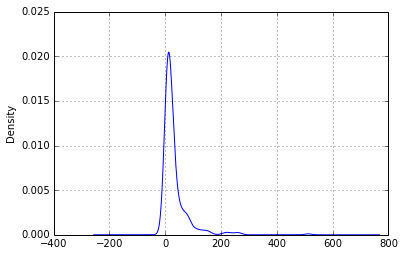

In [5]:
get_ipython().magic(u'matplotlib inline')
df_training_clean['Fare'].plot(kind='kde')

In [6]:
array_training_clean=df_training_clean.values
array_target=target.values
#the shape method tells us about the rank of the array
print 'The shape of training array is: ',array_training_clean.shape 
print 'The shape of the target array is: ',array_target.shape

The shape of training array is:  (891, 5)
The shape of the target array is:  (891,)


In [7]:
from sklearn import tree #import tree algorithm from scikit-learn
#Intitialize the DecisionTreeClassifier algorithm with optional parameters 
classifier = tree.DecisionTreeClassifier(min_samples_leaf=5, max_depth=4) 
#use the initialized tree to learn the relationship between 
#known passanger information, features, and known state of survival 
classifier.fit(array_training_clean, array_target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=5,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [8]:
print "First 5 training target"
print array_target[0:5]
print "Prediction on first 5 training Rows"
print classifier.predict(array_training_clean[0:5,:])

First 5 training target
[0 1 1 1 0]
Prediction on first 5 training Rows
[0 1 0 1 0]


In [9]:
#We can see the score, the efficiency of the training as follows
print("Training Score: ", classifier.score(array_training_clean, array_target))

('Training Score: ', 0.734006734006734)


In [10]:
# Weekend Assignment

test_data_filepath='titanic/data/test.csv'
print 'The path to the test data set is correct: ', os.path.exists(test_data_filepath)

The path to the test data set is correct:  True


In [11]:
df_test = pd.read_csv(test_data_filepath)
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 12 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
Survived       418 non-null int64
dtypes: float64(2), int64(5), object(5)

In [12]:
df_test_clean = df_test.drop(['Age','Cabin','Embarked','Name','Sex','Ticket'],axis=1)

In [13]:
mean_fare_by_pclass = df_test_clean[['Pclass','Fare']].groupby(['Pclass']).agg('mean')['Fare']
fare_given_pclass=df_test_clean['Pclass'].apply(lambda x: mean_fare_by_pclass[x])
df_test_clean['Fare'].fillna(fare_given_pclass,inplace=True)
df_test_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 6 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           418 non-null float64
Survived       418 non-null int64
dtypes: float64(1), int64(5)

In [14]:
array_test_clean = df_test_clean.values

In [15]:
survival_prediction = classifier.predict(array_test_clean)

ValueError: Number of features of the model must  match the input. Model n_features is 5 and  input n_features is 6 

In [18]:
df_test_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 6 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           418 non-null float64
Survived       418 non-null int64
dtypes: float64(1), int64(5)

In [19]:
survival_prediction

NameError: name 'survival_prediction' is not defined

In [20]:
with open('prediction.csv', 'w') as csvfile:
    for survived in survival_prediction:
        csvfile.write("{}\n".format(survived)) 

NameError: name 'survival_prediction' is not defined

In [60]:
prediction = pd.read_csv('titanic/data/prediction.csv')

In [61]:
survived = prediction[prediction['Survived'] == 1]

dead = prediction[prediction['Survived'] == 0]

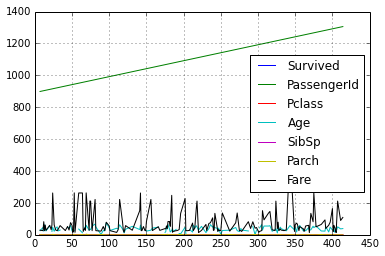

In [63]:
get_ipython().magic(u'matplotlib inline')
survived.plot()

([<matplotlib.axis.XTick at 0x7f4a5373fe10>,
 <a list of 3 Text xticklabel objects>)

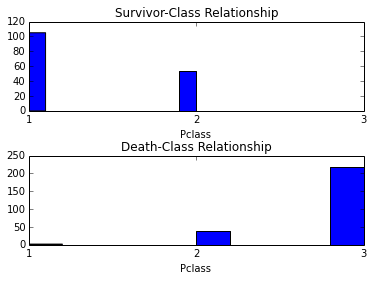

In [97]:
plt.subplot(211)
#plt.ylim(0.0, 1600.0)
survived['Pclass'].hist()
plt.grid()
plt.title('Survivor-Class Relationship')
plt.xlabel('Pclass')
plt.xticks([1, 2, 3])
plt.subplot(212)
dead['Pclass'].hist()
plt.grid()
plt.title('Death-Class Relationship')
plt.xlabel('Pclass')
plt.subplots_adjust(hspace = 0.5, bottom=None, top=None, right=None, left = None)
plt.xticks([1, 2, 3])

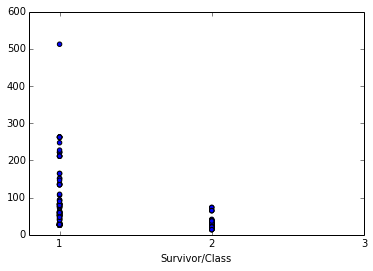

In [78]:
X = survived['Pclass'].values
plt.ylim(0.0, 600.0)
Y = survived['Fare'].values
plt.scatter(X, Y)
plt.xticks([1, 2, 3])
plt.xlabel('Survivor/Class')
plt.ylabel('')

In [1]:
X = dead['Pclass'].values
#plt.ylim(0.0, 600.0)
Y = dead['Fare'].values
plt.xticks([1, 2, 3])
plt.scatter(X, Y)
plt.xlabel('Death/Class Relationship')
plt.ylabel('Death/Fare Relationship')

NameError: name 'dead' is not defined

([<matplotlib.axis.YTick at 0x7f4a53646b10>,
 <a list of 5 Text yticklabel objects>)

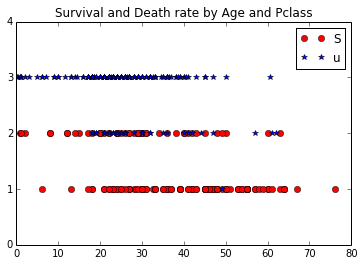

In [98]:
plt.plot(survived['Age'], survived['Pclass'],'ro')
plt.plot(dead['Age'], dead['Pclass'],'b*')
plt.legend('Survived')
plt.title('Survival and Death rate by Age and Pclass')
plt.yticks([0,1,2,3,4])